In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import plotly.express as px

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [38]:
df = sns.load_dataset('flights')

In [39]:
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


### **PRE-PROCESSING AND EDA**

In [40]:
df.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

In [42]:
df.nunique()

year           12
month          12
passengers    118
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        144 non-null    int64
 1   month       144 non-null    int32
 2   passengers  144 non-null    int64
dtypes: int32(1), int64(2)
memory usage: 2.9 KB


In [63]:
df.describe()

,year,month,passengers
count,144.000000,144.000000,144.000000
mean,1954.500000,5.500000,280.298611
std,3.464102,3.464102,119.966317
min,1949.000000,0.000000,104.000000
25%,1951.750000,2.750000,180.000000
50%,1954.500000,5.500000,265.500000
75%,1957.250000,8.250000,360.500000
max,1960.000000,11.000000,622.000000


In [65]:
df.shape

(144, 3)

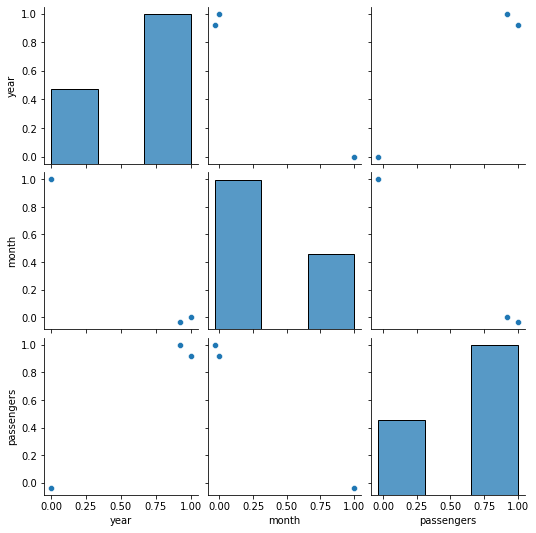

In [68]:
sns.pairplot(df.corr())

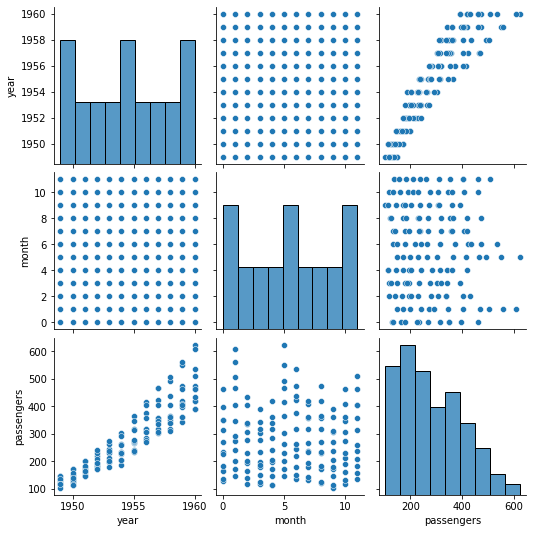

In [70]:
sns.pairplot(df)

In [73]:
px.histogram(df, x='month', y='passengers', title='COUNT VALUES OF PASSENGERS')

In [81]:
px.scatter(df, title='OVERALL CONCEPT')

In [83]:
px.bar(df, x='year', y='passengers',color='month')

# **MACHINE LEARNING AND USING LINEAR AND MULTILINEAR REGRESSION**

In [6]:
label = LabelEncoder()

In [43]:
df['month']= label.fit_transform(df['month'])
df

,year,month,passengers
0,1949,4,112
1,1949,3,118
2,1949,7,132
3,1949,0,129
4,1949,8,121
...,...,...,...
139,1960,1,606
140,1960,11,508
141,1960,10,461
142,1960,9,390


# **LINEAR REGRESSION**

In [84]:
X = df.iloc[:,1:2]
X

,month
0,4
1,3
2,7
3,0
4,8
...,...
139,1
140,11
141,10
142,9


In [85]:
Y = df.iloc[:,2:]

In [86]:
Y

,passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7, random_state=0)

In [87]:
model_1 = LinearRegression()

In [89]:
model_1.fit(X_train, Y_train)

LinearRegression()

In [90]:
model_1.predict(X_test)

array([[295.63962093],
       [278.20477278],
       [288.66568167],
       [274.71780314],
       [274.71780314],
       [260.76992462],
       [292.1526513 ],
       [267.74386388],
       [264.25689425],
       [271.23083351],
       [281.69174241],
       [285.17871204],
       [271.23083351],
       [264.25689425],
       [281.69174241],
       [264.25689425],
       [285.17871204],
       [260.76992462],
       [295.63962093],
       [299.12659057],
       [274.71780314],
       [260.76992462],
       [288.66568167],
       [285.17871204],
       [295.63962093],
       [281.69174241],
       [299.12659057],
       [260.76992462],
       [278.20477278],
       [281.69174241],
       [292.1526513 ],
       [299.12659057],
       [264.25689425],
       [274.71780314],
       [285.17871204],
       [267.74386388],
       [271.23083351],
       [264.25689425],
       [260.76992462],
       [285.17871204],
       [288.66568167],
       [260.76992462],
       [281.69174241],
       [271

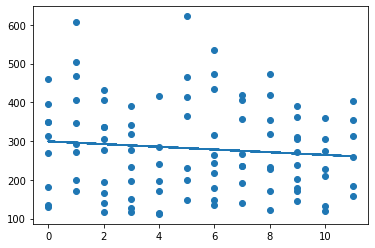

In [92]:
plt.scatter(X_train, Y_train)
plt.plot(X_train,model_1.predict(X_train))
plt.show()

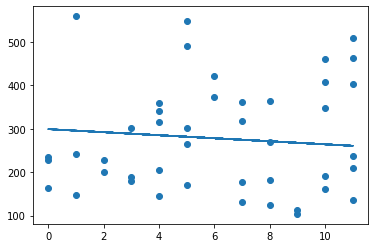

In [93]:
plt.scatter(X_test, Y_test)
plt.plot(X_test,model_1.predict(X_test))
plt.show()

In [98]:
model_1.score(X_train,Y_train)

0.010237977027543699

In [99]:
model_1.score(X_test,Y_test)

-0.030387202647832234

# **MULTI-LINEAR REGRESSION**

In [44]:
x = df.iloc[:,0:2]
x

,year,month
0,1949,4
1,1949,3
2,1949,7
3,1949,0
4,1949,8
...,...,...
139,1960,1
140,1960,11
141,1960,10
142,1960,9


In [45]:
y= df.iloc[:,2:]
y

,passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [47]:
model = LinearRegression()

In [48]:
model.fit(x_train,y_train)

LinearRegression()

In [49]:
model.predict(x_test)

array([[116.96438036],
       [324.03771434],
       [361.88323718],
       [165.95758332],
       [384.15501843],
       [406.42679968],
       [239.42380877],
       [130.3368807 ],
       [408.65161991],
       [132.56170093],
       [419.77572104],
       [422.00054127],
       [194.90382525],
       [190.45418479],
       [232.74934809],
       [159.28312263],
       [172.632044  ],
       [ 94.71617809],
       [428.67500195],
       [243.87344922],
       [321.81289411],
       [375.25573752],
       [206.02792638],
       [359.65841695],
       [210.47756684],
       [388.60465888],
       [275.04451138],
       [437.59786184],
       [355.2087765 ],
       [139.23616161],
       [270.59487093],
       [181.5313249 ],
       [439.82268207],
       [103.615459  ],
       [266.14523047],
       [ 99.16581854],
       [288.41701173],
       [346.30949559],
       [219.40042673],
       [390.82947911],
       [268.3700507 ],
       [188.22936457],
       [263.92041025],
       [381

In [51]:
model.score(x_train,y_train)

0.8480914649431279

In [52]:
model.score(x_test, y_test)

0.8519808372164162